<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/spectra_smooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [175]:
os.chdir("/content/drive/My Drive/my_book/book_mypython")



In [176]:
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import scipy

from scipy import signal

np.random.seed(1)

x = np.linspace(0, 10, 100)
y = np.sin(x)
noise = 2 * np.random.random(len(x)) - 1 # uniformly distributed between -1 and 1
y_noise = y + noise

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=2, color='black'),
    name='Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=y_noise,
    mode='markers',
    marker=dict(
        size=6,
        color='royalblue',
        symbol='circle-open'
    ),
    name='Noisy Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=signal.savgol_filter(y,
                           53, # window size used for filtering
                           3), # order of fitted polynomial
    mode='markers',
    marker=dict(
        size=6,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay'
))


fig.show()


In [177]:
#https://www.mikulskibartosz.name/smoothing-time-series-in-python-using-savitzky-golay-filter/
schl=pd.read_csv("chl_filtered.csv")
list(schl)


['Unnamed: 0',
 'd1M',
 'd1S',
 'd2M',
 'd2S',
 'd3M',
 'd3S',
 'd4M',
 'd4S',
 'd5M',
 'd5S',
 'd6M',
 'd6S',
 'd7M',
 'd7S',
 'd10M',
 'd10S',
 'nm']

In [178]:
from scipy import signal
from scipy.signal import savgol_filter
lam=schl['nm']
i=1
L=list(schl)
LL=L[1:16:2]


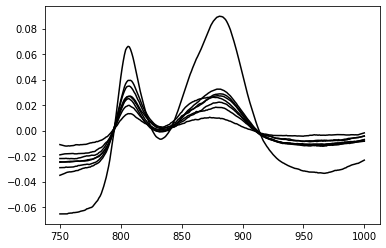

In [179]:

for i in LL:
  spec = schl[i]
  #plt.plot(lam,spec,'r:')
  btc={}
  btcd={}
  btcd = { 
    'lam' : lam, 
    'inten' : spec, 
  } 
  
# creating a Dataframe object  
  btc = pd.DataFrame(btcd) 
  
# btc
#smoothed_2dg = savgol_filter(btc, window_length = 5, polyorder = 2)
# # smoothed_2dg

  smoothed_1dg = savgol_filter(btc['inten'], window_length = 9, polyorder = 1)
# # smoothed_1dg
  ys=signal.detrend(smoothed_1dg)
  plt.plot(lam,ys,'k-')
plt.show()


# We need further correction as the negative offset values have to be corrected. 

In [180]:
LL

['d1M', 'd2M', 'd3M', 'd4M', 'd5M', 'd6M', 'd7M', 'd10M']

In [181]:
def readCDT(df,lam,LLL,pepname):# T must be in numbers 
  
  X=df.values
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(LLL[i]))
      plt.ylabel(r'$AU $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title([' Variation in Ponds',pepname])
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return 0

In [182]:
def tonumbers(s):
  # 20C=>20
  S=[]
  for i in s:
    S.append(int(re.search(r"\d+", i).group(0)))
  return(S)
LLL=tonumbers(LL)



In [183]:
from numpy import zeros, r_
a=np.zeros((2,3))
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [184]:
print(len(LLL),schl.shape)

8 (251, 18)


Let us create an empty data frame 

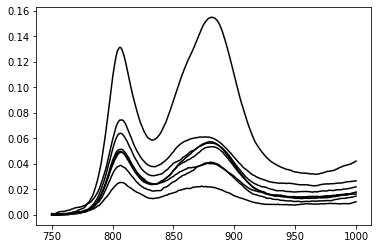

In [185]:
df = pd.DataFrame() 

for i in LL:
  spec = schl[i]
  #plt.plot(lam,spec,'r:')
  btc={}
  btcd={}
  btcd = { 
    'lam' : lam, 
    'inten' : spec, 
  } 
  
# creating a Dataframe object  
  btc = pd.DataFrame(btcd) 
  
# btc
#smoothed_2dg = savgol_filter(btc, window_length = 5, polyorder = 2)
# # smoothed_2dg

  smoothed_1dg = savgol_filter(btc['inten'], window_length = 9, polyorder = 1)
# # smoothed_1dg
  ys=signal.detrend(smoothed_1dg)
  plt.plot(lam,ys-np.min(ys),'k-')
  df[i]=ys-np.min(ys)
plt.show()
df.to_csv("Corrected_chl.csv")


In [186]:
df

,d1M,d2M,d3M,d4M,d5M,d6M,d7M,d10M
0,0.001152,0.000000,0.000186,0.000000,0.000261,0.000000,0.000000,0.000000
1,0.000901,0.000377,0.000191,0.000027,0.000196,0.000194,0.000093,0.000015
2,0.000649,0.000755,0.000196,0.000053,0.000131,0.000387,0.000186,0.000030
3,0.000398,0.001132,0.000201,0.000080,0.000065,0.000581,0.000279,0.000045
4,0.000146,0.001510,0.000206,0.000107,0.000000,0.000774,0.000372,0.000059
...,...,...,...,...,...,...,...,...
246,0.009209,0.026257,0.016819,0.021084,0.016382,0.013799,0.016527,0.040155
247,0.009491,0.026376,0.017082,0.021327,0.016375,0.014025,0.016812,0.040661
248,0.009773,0.026495,0.017345,0.021570,0.016368,0.014252,0.017097,0.041168
249,0.010055,0.026614,0.017609,0.021814,0.016361,0.014479,0.017381,0.041674


0

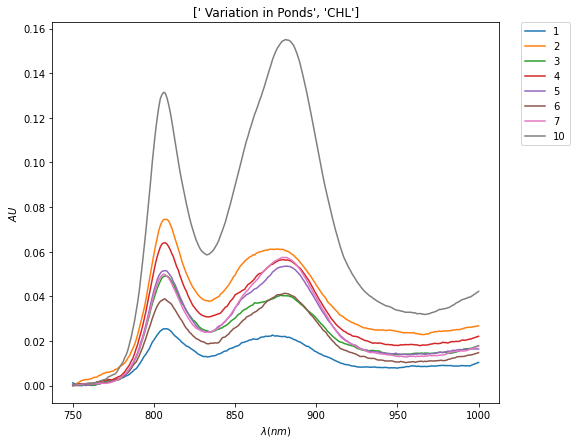

In [187]:
 readCDT(df,lam,LLL,"CHL")

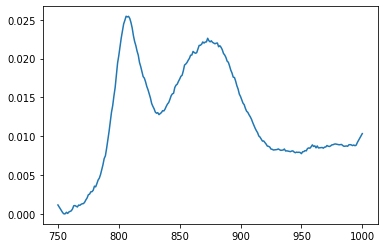

In [188]:
# Now let us find the two maxima 
plt.plot(lam,df['d1M'])

In [189]:
df['nm']=lam
y=df['d1M']
L1=lam[y==np.max(y)]
y[56]
df1=df[df['nm']>850]
y1=df1['d1M']
lam1=df1['nm']
L2=lam1[y1==np.max(y1)]







In [190]:
L1

56    806
Name: nm, dtype: int64

In [191]:
L2

123    873
Name: nm, dtype: int64

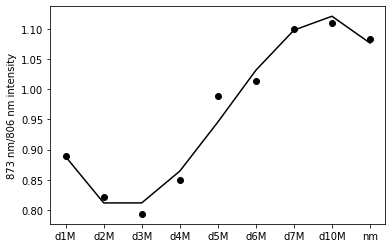

In [192]:
df1=df[df['nm']==806]
df2=df[df['nm']==873]
df3=pd.concat([df1,df2],axis=0)
rat=df3.iloc[1,:]/df3.iloc[0,:]
srat=savgol_filter(rat, window_length = 9, polyorder = 3)
plt.plot(rat,'ko')
plt.plot(srat,'k-')
plt.ylabel('873 nm/806 nm intensity')
plt.show()
